In [74]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.io.json import json_normalize
import json
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve 

### Part 1 

Loading Data 

In [38]:
df=pd.read_json('/Users/dasha/Downloads/ultimate_challenge 2/logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Creating a 'count' column to be able to count the logins at specified timepoints 

In [40]:
df['Count']=1
df.set_index('login_time',inplace=True)
df=df.resample('15Min').count()
df.head()

,Count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


It seems that the logins seem to rise during the months of March and April 

Text(0.5,1,'Login Counts by 15 min intervals')

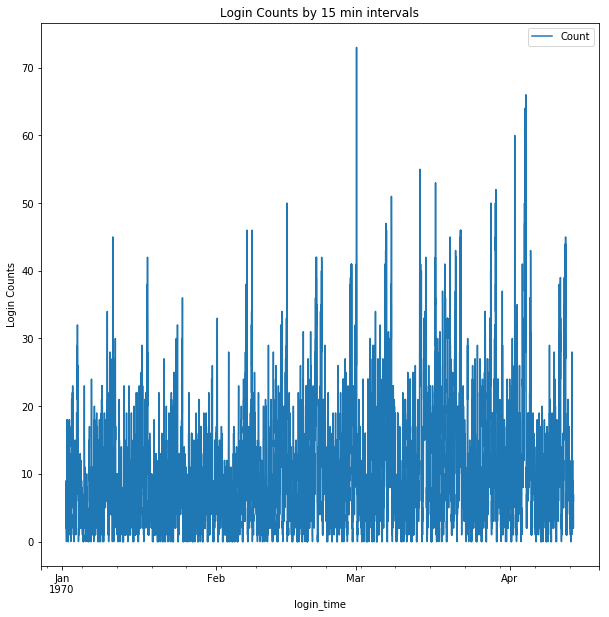

In [41]:
df.plot(figsize=(10,10))
plt.ylabel('Login Counts')
plt.title('Login Counts by 15 min intervals')

The weekly mean data confirms this observation 

Text(0.5,1,'Weekly Mean Login Counts')

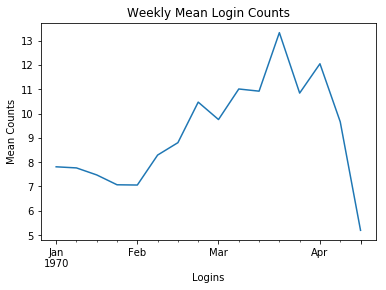

In [42]:
df['Count'].resample('W').mean().plot()
plt.xlabel('Logins')
plt.ylabel('Mean Counts')
plt.title('Weekly Mean Login Counts')

Daily data portrays the fact that the the logins spike during the middle of the week and decline at the end of the week

Text(0.5,1,'Daily Mean Login Counts')

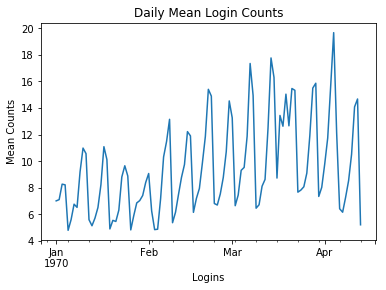

In [43]:
df['Count'].resample('D').mean().plot()
plt.xlabel('Logins')
plt.ylabel('Mean Counts')
plt.title('Daily Mean Login Counts')

### Part 2

2.1.	The metric for success would be seeing Ultimate drivers from both cities being active during both parts of the day during the weekdays. Ultimate Gotham drivers active during the day would surely be ferrying Metropolites around, as Gotham’s activity drops during the daylight hours. Conversely, Ultimate Metropolis drivers increase their night time activity, as they would now be serving the more nocturnal Gothans. Theoretically, this should also increase the number of individuals using the Ultimate service, under the assumption that the number of Ultimate drivers does not saturate supply, and that demand remains high. 

2.2.	Observing the change would be simple. One needs to take the data from the first couple of months of the new policy, and compare the numbers of time Ultimate was used prior to change. Data could also be gathered on changes in daily activity amongst individual Ultimate drivers, as well as average activity change amongst Metropolite and Gothan drivers. This can be evaluated using old fashioned t-test.

2.3 If the results point to an increase in the activity of Ultimate drivers in each of the cities, then eliminating toll would be one option to take a look at. If there is no difference, other incentives migth be worth to look at. It might be that it is just difficult to encourage the customers to visit another city that has little activity (at night time). Perhaps, adding on promotions to some active sites in the non-active city together with the ride can be an way to bring in more customers. 


### Part 3

Loading data 

In [44]:
with open('/Users/dasha/Downloads/ultimate_challenge 3/ultimate_data_challenge.json') as file: 
    data=json.load(file)
df2=pd.DataFrame(data)

In [45]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Converting to date columns to datetime variables 

In [47]:
df2.loc[:,['last_trip_date','signup_date']]=df2.loc[:,['last_trip_date','signup_date']].apply(pd.to_datetime)

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


Creating classification variable - all customers with 'last_trip_date' in June (last 30 days of the study) are considered 'Active' and are labeled with 1. Customers that terminated using service before June are considered as 'Not Active' and are labeled with 0. 

In [49]:
date_value=pd.Timestamp('2014-06-01')
def classifier(data):
    '''classifies the data greater than zero as active and the data equal to 0 as non-active'''
    if data>= date_value: 
        return 1
    else: 
        return 0
df2['status']=df2['last_trip_date'].apply(classifier)

In [50]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


Dropping null values...

In [51]:
df2=df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 13 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
signup_date               41445 non-null datetime64[ns]
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
status                    41445 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.2+ MB


Which cities get the most traffic? It seems that the Winterfell is the most popular. 

Text(0,0.5,'Number of Trips')

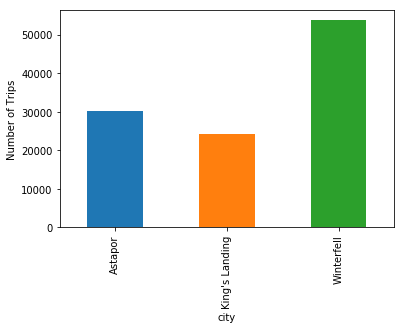

In [52]:
df2.groupby('city')['trips_in_first_30_days'].sum().plot(kind='bar')
plt.ylabel('Number of Trips')

Does the average rating of the drivers have something to do with the popularity of Winterfell

In [53]:
df2['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

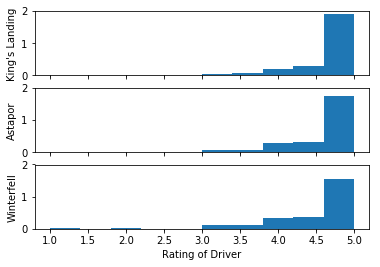

In [54]:
cities=df2['city'].unique().tolist()
fig,axes=plt.subplots(3,1,sharex='col',sharey='col')
for idx,city in enumerate(cities): 
    plot=df2[df2['city']==city]['avg_rating_of_driver'].plot(kind='hist',ax=axes[idx],density=True)
    plt.xlabel('Rating of Driver')
    plot.set_ylabel(cities[idx])

Could the sign-up date have soemthing to do with the amount of trips taken in the first 30 days??? Seems that there is a correlation. People who signed up over the weekends tend to take more trips in the first 30 days. 

Text(0,0.5,'Total Number of Trips')

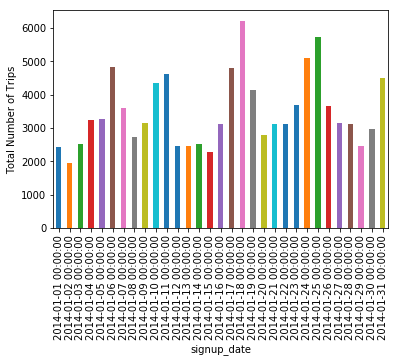

In [55]:
df2.groupby('signup_date')['trips_in_first_30_days'].sum().plot(kind='bar')
plt.ylabel('Total Number of Trips')

Are the 'last_trip_date' correlate with the amount trips are taken in the first 30 days after sign up? Does the ultimate black account have an effect on that? It seems that the more trips taken in the first 30 days, the longer the customer tends to stay. Additionally, having an ulitmate black account persuades customers to take more trips in the first 30 days after sign up.   

In [56]:
df_last_trip=df2.groupby(['last_trip_date','ultimate_black_user'])['trips_in_first_30_days'].sum().to_frame()
df_last_trip.reset_index(inplace=True)
df_last_trip.head()

,last_trip_date,ultimate_black_user,trips_in_first_30_days
0,2014-01-01,False,66
1,2014-01-01,True,13
2,2014-01-02,False,118
3,2014-01-02,True,44
4,2014-01-03,False,104


Text(0,0.5,'Total Amount of Trips in the First 30 Days')

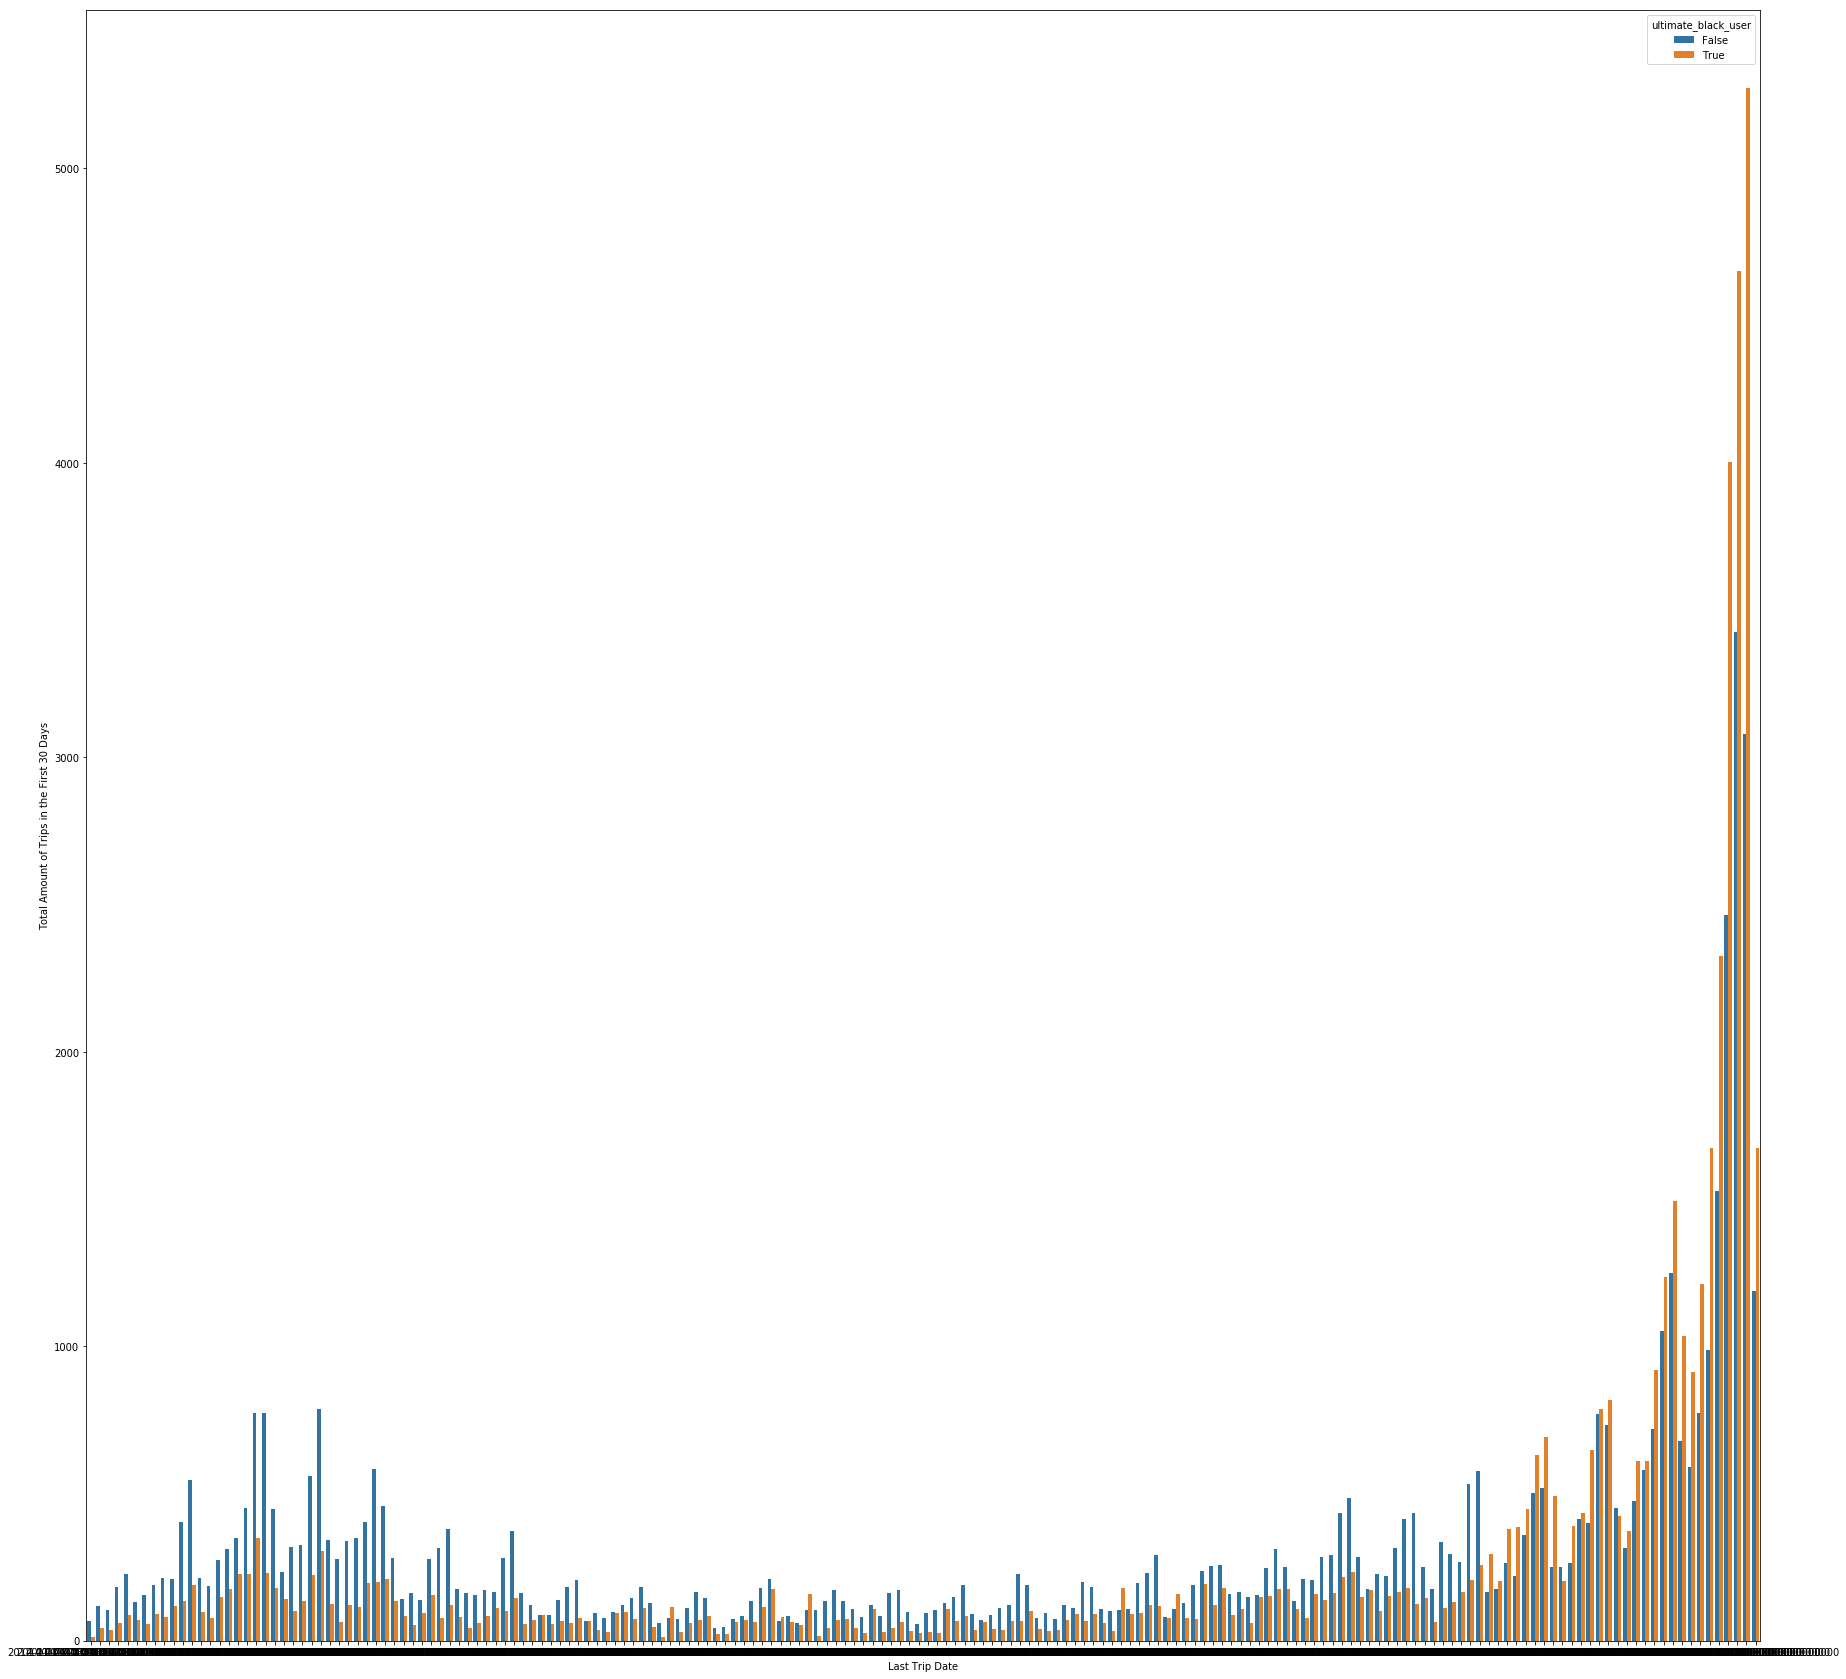

In [57]:
fig = plt.gcf()
fig.set_size_inches(30, 30)
sns.barplot(x='last_trip_date',y='trips_in_first_30_days',data=df_last_trip,hue='ultimate_black_user')
plt.xlabel('Last Trip Date')
plt.ylabel('Total Amount of Trips in the First 30 Days')

Lower Surge promotes higher amount of trips as shown below. 

Text(0,0.5,'Number of Trips')

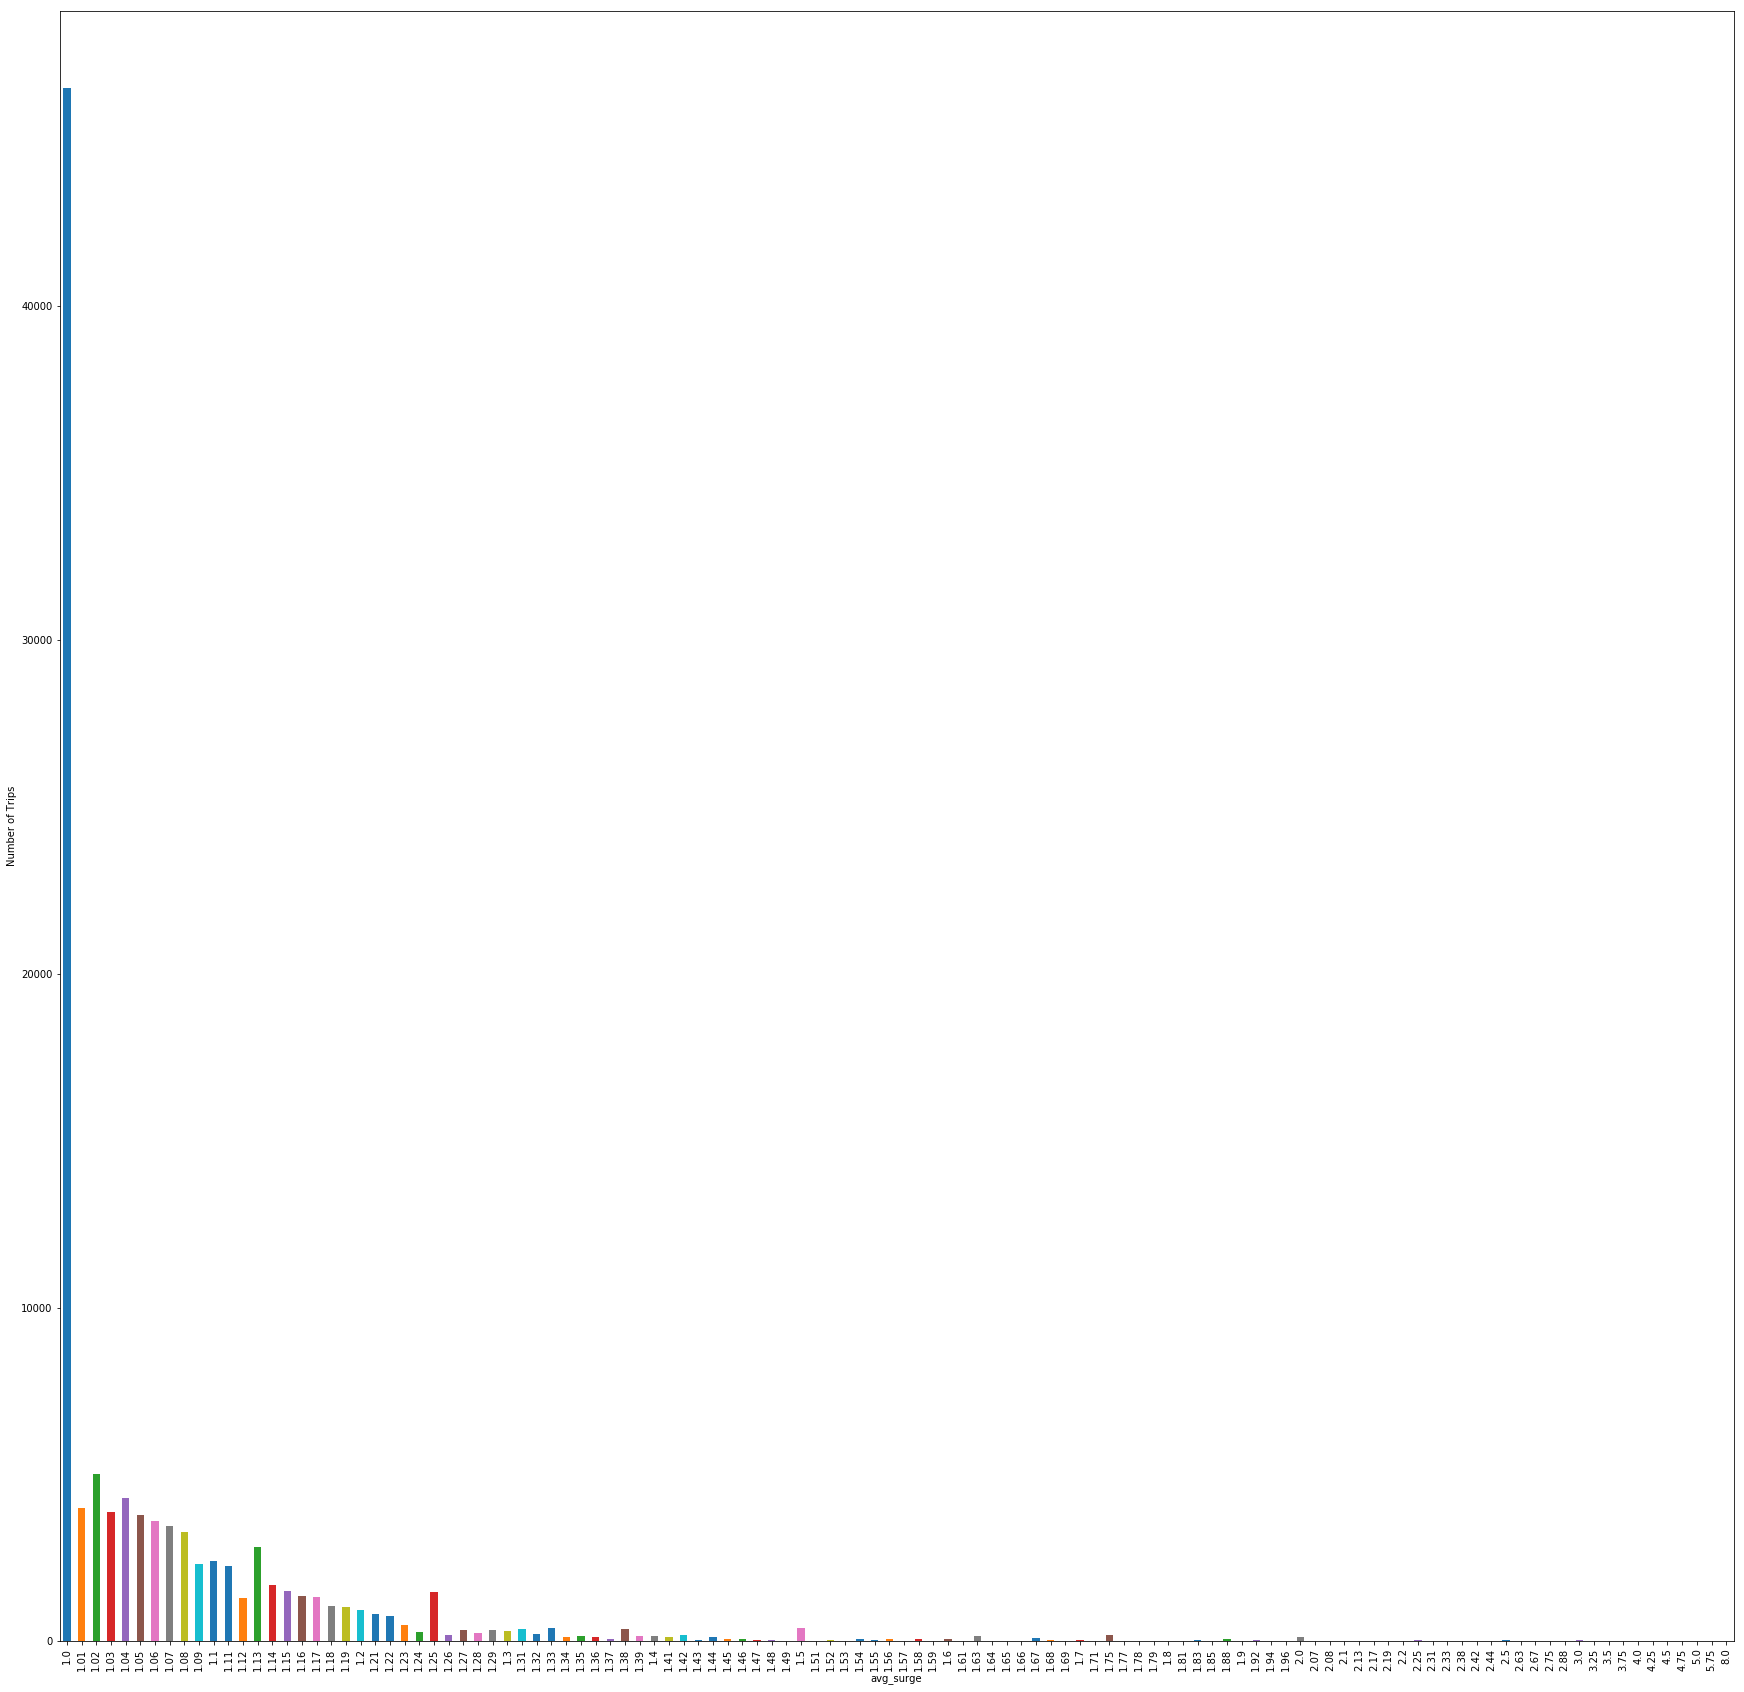

In [58]:
df2.groupby('avg_surge')['trips_in_first_30_days'].sum().plot(kind='bar',figsize=(30,30))
plt.ylabel('Number of Trips')

It seems that non-active members (members that don't stick around too long) tend to take more of the longer trips (see below)

In [59]:
df2['status'].value_counts()

0    24410
1    17035
Name: status, dtype: int64

Text(0,0.5,'Non-Active')

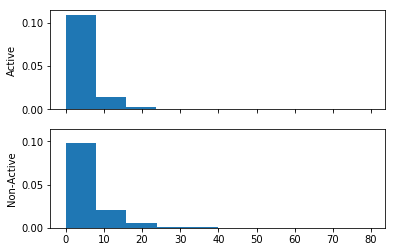

In [60]:
fig,ax=plt.subplots(2,1,sharex='col',sharey='col')
df2[df2['status']==1]['avg_dist'].plot(ax=ax[0],kind='hist',density=True)
ax[0].set_ylabel('Active')
df2[df2['status']==0]['avg_dist'].plot(ax=ax[1],kind='hist',density=True)
ax[1].set_ylabel('Non-Active')


Non-Active members tend to provide a more spread out experience with the driver, while the active members tend to usually experience either a bad experience or a good 

Text(0,0.5,'Non-Active')

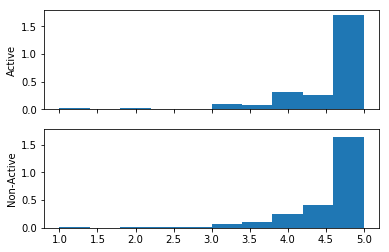

In [61]:
fig,ax=plt.subplots(2,1,sharex='col',sharey='col')
df2[df2['status']==0]['avg_rating_of_driver'].plot(ax=ax[0],kind='hist',density=True)
ax[0].set_ylabel('Active')
df2[df2['status']==1]['avg_rating_of_driver'].plot(ax=ax[1],kind='hist',density=True)
ax[1].set_ylabel('Non-Active')

The non-active customers tend to take more trips to Wnterfell and Astapor. 

In [62]:
print('---------------')
print('Active')
print('---------------')
print(df2[df2['status']==1]['city'].value_counts())
print('---------------')
print('Non-Active')
print('---------------')
print(df2[df2['status']==0]['city'].value_counts())

---------------
Active
---------------
Winterfell        7470
King's Landing    5736
Astapor           3829
Name: city, dtype: int64
---------------
Non-Active
---------------
Winterfell        11691
Astapor            9680
King's Landing     3039
Name: city, dtype: int64


SIgn up date does not seem to affect the status of the customer... However, there are more customers that are non-active members. 

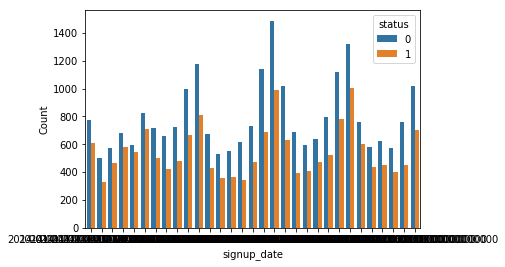

In [63]:
df_sign_up=df2.loc[:,['signup_date','status']]
df_sign_up=df_sign_up.groupby(['signup_date','status']).size().to_frame('Count').reset_index()
sns.barplot(x='signup_date', y='Count', hue='status',data=df_sign_up)


### Predictive Modeling

In [64]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,status
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


Creating split time variables, dummy variables and categorical variables 

In [65]:
df2['last_month']=df2['last_trip_date'].dt.month
df2['last_day']=df2['last_trip_date'].dt.day
df2['sign_day']=df2['signup_date'].dt.day
df2['ultimate_black_user']=pd.Categorical(df2['ultimate_black_user'])

In [66]:
df2=pd.get_dummies(df2)

In [67]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,status,last_month,last_day,sign_day,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,6,17,25,0,1,0,0,1,0,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,5,5,29,1,0,0,1,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,1,7,6,1,0,0,0,1,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,6,29,10,0,1,0,0,1,0,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,3,15,27,0,0,1,1,0,1,0


Preparing the dataframe for machine learning. Splitting the data into training and testing sets... setting up a pipeline to tune the hyperparameters. Will use SVC() here as a model (good for 2 label classification) 

In [68]:
y=df2.status.values
x=df2.drop(columns=['status','last_trip_date','signup_date']).values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
pipe=Pipeline([('std_scaler',StandardScaler()),('model',SVC(probability=True))])

Setting up the gridsearch to find the best cross-validated model parameters...

In [81]:
params={'model__C':[0.001, 0.1, 1, 10, 100],'model__gamma':['scale','auto']}
gs=GridSearchCV(pipe,params,cv=10)
gs.fit(x_train,y_train)
gs.best_score_

0.999034848850436

Best score is 99.9% with 5 cross validation. 

In [82]:
print('Best parameters are: ',gs.best_params_)

Best parameters are:  {'model__C': 10, 'model__gamma': 'scale'}


ROC curve

In [83]:
y_pred_proba=gs.predict_proba(x_test)[:,1]

Text(0.5,1,'ROC curve')

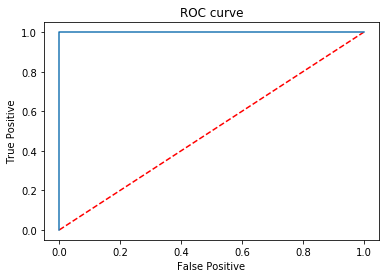

In [84]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot([0,1],[0,1],'k--',color='red')
plt.plot(fpr,tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve')

Cross tabulation of the predictions seem very uniform ...

In [85]:
df_pred=pd.DataFrame({'true':y_test,'predicted':gs.predict(x_test)})
pd.crosstab(df_pred['true'],df_pred['predicted'])

predicted,0,1
true,,
0,7290,3
1,7,5134
